In [10]:
!python --version

Python 3.10.11


In [11]:
!pip install keras-visualizer
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 26.7 MB/s eta 0:00:00


# Import Library

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2,math,os,glob
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import scipy
from imblearn.over_sampling import RandomOverSampler
import warnings

In [12]:
import visualkeras
from keras_visualizer import visualizer 

# Import/Download the Dataset

In [ ]:
!wget https://www.dropbox.com/s/rlezn4w74709oum/face_expression_recog.csv.zip

--2023-05-26 07:48:04--  https://www.dropbox.com/s/rlezn4w74709oum/face_expression_recog.csv.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/rlezn4w74709oum/face_expression_recog.csv.zip [following]
--2023-05-26 07:48:04--  https://www.dropbox.com/s/raw/rlezn4w74709oum/face_expression_recog.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c4cfd64bd7faf7012f874a392.dl.dropboxusercontent.com/cd/0/inline/B8z08orsT51wGAYVPaX7Rh_5Ey5JmzM1Azm76KC8ROYYdFO_VtoAa5xl9EwvItIXHDYq4EjKXNd5gr1snIA-Z-33_mpgAeieOpEIbjbIKyxoOy6dcbnt2Fp5zmQu67lIgnOMbaZNa-68YFhImk7T74N1azbymH552Irz2dJsPZX9Tw/file# [following]
--2023-05-26 07:48:05--  https://uc9c4cfd64bd7faf7012f874a392.dl.dropboxusercontent.com/cd/0/inline/B8z08orsT51wGAYVPaX7Rh_5Ey5Jm

In [ ]:
!unzip face_expression_recog.csv.zip

Archive:  face_expression_recog.csv.zip
  inflating: fer2013.csv             


# Read/view the Database

In [ ]:
y1a = pd.read_csv('fer2013.csv')
print(y1a.shape)
print(y1a)

(35887, 3)
       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [ ]:
y1 = y1a.loc[:3999,:]
print(y1.shape)
print(y1)

(4000, 3)
      emotion                                             pixels     Usage
0           0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1           0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2           2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3           4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4           6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
...       ...                                                ...       ...
3995        0  25 71 114 80 73 82 94 119 142 156 166 173 172 ...  Training
3996        6  32 69 63 66 50 53 68 66 67 70 60 83 97 111 127...  Training
3997        6  140 141 53 29 25 14 56 153 196 208 211 219 220...  Training
3998        3  58 64 63 33 28 27 29 28 29 34 36 46 66 77 74 7...  Training
3999        5  133 133 105 79 85 88 94 97 98 100 108 112 116 ...  Training

[4000 rows x 3 columns]


# Target/Prediction Class 

In [ ]:
predict_class_count = y1.emotion.value_counts()
display(predict_class_count)

3    1019
6     706
4     668
2     572
0     567
5     414
1      54
Name: emotion, dtype: int64

In [ ]:
from plotly.offline import iplot
pred_class = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral' ]
trace = go.Pie(labels = pred_class, values = predict_class_count)
data = [trace]
fig = go.Figure(data = trace)
iplot(fig)

# Target CLass representation

# 0 : Angry, 1 : Disgust, 2 : Fear, 3 : Happy, 4 : Sad, 5 : Surprise, 6 : Neutral

In [ ]:
xx = y1.pixels  # independent features
yy = y1.emotion # target class

# Reshaping the values by oversampler 

In [ ]:
data_oversampling = RandomOverSampler(sampling_strategy='auto')

xx_n, yy_n = data_oversampling.fit_resample(xx.values.reshape(-1,1), yy)
print(xx_n.shape," ",yy_n.shape)

(7133, 1)   (7133,)


# Value check for target class

In [ ]:
yy_n.value_counts()

0    1019
2    1019
4    1019
6    1019
3    1019
5    1019
1    1019
Name: emotion, dtype: int64

# Data Flatten - convert muti Dimension data into 1D

In [ ]:
xx_n1 = pd.Series(xx_n.flatten())
xx_n1

0       70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1       151 150 147 155 148 133 111 140 170 174 182 15...
2       231 212 156 164 174 138 161 173 182 200 106 38...
3       24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4       4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                              ...                        
7128    1 5 9 16 23 12 8 10 13 21 32 42 33 45 67 76 86...
7129    147 151 154 156 160 117 56 44 64 80 82 84 92 9...
7130    249 247 246 242 238 235 230 239 113 51 62 65 6...
7131    83 87 91 92 91 84 78 80 90 85 9 5 3 0 10 21 39...
7132    120 121 123 120 120 122 127 67 55 86 89 92 96 ...
Length: 7133, dtype: object

# Normalization

In [ ]:
xx_n2 = np.array(list(map(str.split, xx_n1)), np.float32)
xx_n2/=255
xx_n2[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

# Independent features - data reshaping/resizing

In [ ]:
xx_data_new = xx_n2.reshape(-1, 48, 48, 1)
xx_data_new.shape

(7133, 48, 48, 1)

# convert target class data into array format

In [ ]:
yy_n1 = np.array(yy_n)
yy_data_new = yy_n1.reshape(yy_n1.shape[0], 1)
yy_data_new.shape

(7133, 1)

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(xx_data_new, yy_data_new, test_size = 0.15, random_state = 45)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6063, 48, 48, 1) (6063, 1)
(1070, 48, 48, 1) (1070, 1)


# Calling Library

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing import image

In [ ]:
model1 = Sequential([
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same',activation='relu'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid',activation='relu'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.6),
    Dense(7, activation = 'softmax') ])
model1.summary()
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

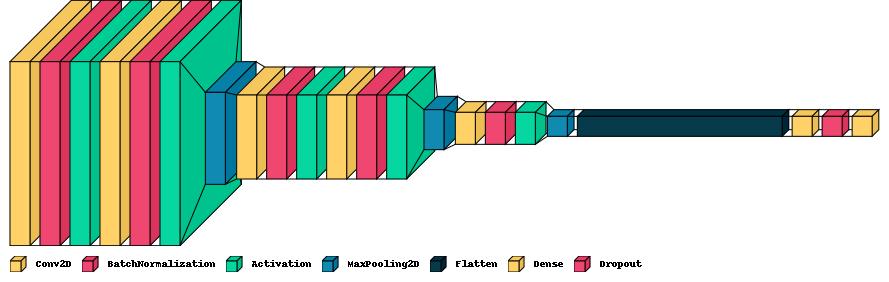

In [ ]:
import tensorflow as tf
import visualkeras
from keras_visualizer import visualizer
tf.keras.utils.plot_model(model1, to_file="my_model1.png", show_shapes=True)
visualkeras.layered_view(model1, legend=True) # without custom font

# Convert Target class (Y_train , Y_test) into catregorical code


In [ ]:
y_train_n = np_utils.to_categorical(y_train, 7)
y_train_n.shape

(6063, 7)

In [ ]:
y_test_n = np_utils.to_categorical(y_test, 7)
y_test_n.shape

(1070, 7)

# Train the CNN model 1

In [ ]:
history1 = model1.fit(X_train, y_train_n, epochs = 35, validation_data=(X_test, y_test_n))

Epoch 1/35
190/190 [==============================] - 100s 517ms/step - loss: 2.0132 - accuracy: 0.1697 - val_loss: 1.9828 - val_accuracy: 0.1374
Epoch 2/35
190/190 [==============================] - 98s 515ms/step - loss: 1.8214 - accuracy: 0.2116 - val_loss: 2.0326 - val_accuracy: 0.1271
Epoch 3/35
190/190 [==============================] - 97s 509ms/step - loss: 1.7210 - accuracy: 0.2636 - val_loss: 1.8525 - val_accuracy: 0.2196
Epoch 4/35
190/190 [==============================] - 98s 515ms/step - loss: 1.6430 - accuracy: 0.2905 - val_loss: 1.7006 - val_accuracy: 0.2794
Epoch 5/35
190/190 [==============================] - 96s 506ms/step - loss: 1.5774 - accuracy: 0.3182 - val_loss: 1.4642 - val_accuracy: 0.4075
Epoch 6/35
190/190 [==============================] - 101s 530ms/step - loss: 1.5176 - accuracy: 0.3431 - val_loss: 1.3610 - val_accuracy: 0.4290
Epoch 7/35
190/190 [==============================] - 100s 526ms/step - loss: 1.4950 - accuracy: 0.3373 - val_loss: 1.5096 - val

#

In [ ]:
history1 = model1.fit(X_train, y_train_n, epochs = 15, validation_data=(X_test, y_test_n))

Epoch 1/15
190/190 [==============================] - 99s 518ms/step - loss: 1.2413 - accuracy: 0.4928 - val_loss: 1.2423 - val_accuracy: 0.5626
Epoch 2/15
190/190 [==============================] - 101s 530ms/step - loss: 1.2139 - accuracy: 0.5011 - val_loss: 1.2092 - val_accuracy: 0.5953
Epoch 3/15
190/190 [==============================] - 100s 529ms/step - loss: 1.1942 - accuracy: 0.5176 - val_loss: 1.2125 - val_accuracy: 0.5598
Epoch 4/15
190/190 [==============================] - 100s 526ms/step - loss: 1.1725 - accuracy: 0.5214 - val_loss: 1.2142 - val_accuracy: 0.5682
Epoch 5/15
190/190 [==============================] - 100s 526ms/step - loss: 1.1889 - accuracy: 0.5265 - val_loss: 1.2364 - val_accuracy: 0.5393
Epoch 6/15
190/190 [==============================] - 98s 518ms/step - loss: 1.1623 - accuracy: 0.5324 - val_loss: 1.2011 - val_accuracy: 0.5832
Epoch 7/15
190/190 [==============================] - 99s 520ms/step - loss: 1.1652 - accuracy: 0.5355 - val_loss: 1.2536 - va

In [ ]:
print("Accuracy  : " , model1.evaluate(X_test,y_test_n)[1]*100 , "%")


34/34 [==============================] - 5s 139ms/step - loss: 1.2129 - accuracy: 0.5850
Accuracy  :  58.50467085838318 %


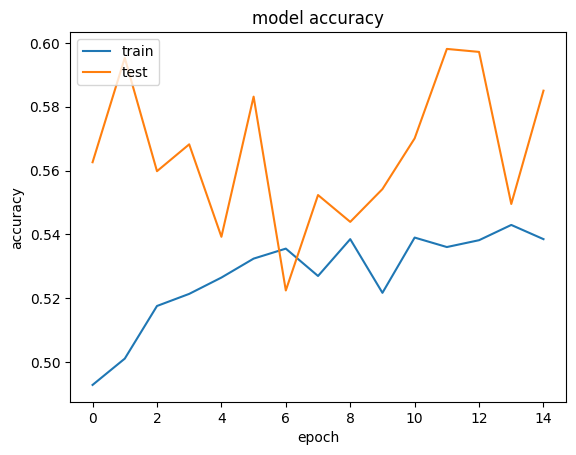

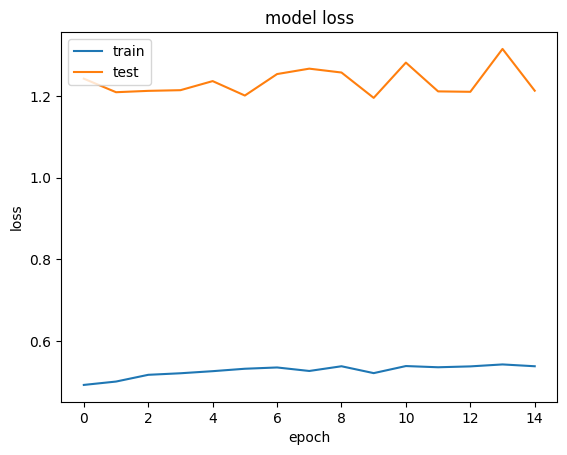

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model1.predict(X_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

34/34 [==============================] - 4s 112ms/step


[2, 2, 3, 0, 3, 6, 3, 6, 6, 4]

In [ ]:
y_actual = []

for pred in y_test_n:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[2, 5, 3, 0, 3, 2, 3, 3, 6, 5]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.25      0.13      0.17       140
           1       1.00      1.00      1.00       166
           2       0.51      0.55      0.53       166
           3       0.76      0.42      0.54       147
           4       0.31      0.62      0.41       136
           5       0.93      0.64      0.76       163
           6       0.53      0.66      0.59       152

    accuracy                           0.59      1070
   macro avg       0.61      0.57      0.57      1070
weighted avg       0.63      0.59      0.59      1070



Text(95.72222222222221, 0.5, 'Truth')

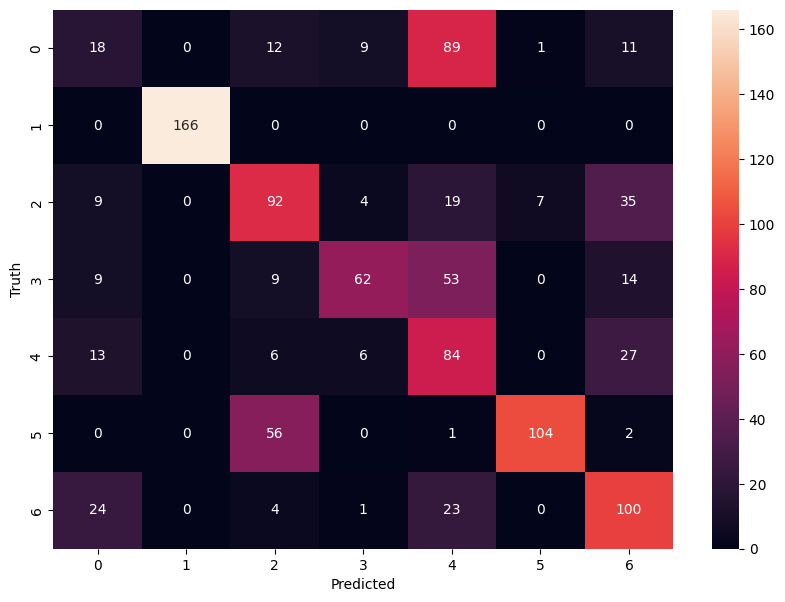

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model 2

In [ ]:
model2 = Sequential()
num_features = 64
#module 1
model2.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(48, 48, 1), data_format='channels_last'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 2
model2.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 3
model2.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model2.add(Flatten())

#dense 1
model2.add(Dense(2*2*2*num_features))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

#dense 2
model2.add(Dense(2*2*num_features))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

#dense 3
model2.add(Dense(2*num_features))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

#output layer
model2.add(Dense(7, activation='softmax'))
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization_5 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 46, 46, 256)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 256)       590080    
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 46, 46, 256)      

In [ ]:
history2 = model2.fit(X_train, y_train_n, epochs = 30, validation_data=(X_test, y_test_n))

Epoch 1/30
190/190 [==============================] - 1005s 5s/step - loss: 1.6700 - accuracy: 0.3663 - val_loss: 2.2707 - val_accuracy: 0.1495
Epoch 2/30
190/190 [==============================] - 1006s 5s/step - loss: 1.1934 - accuracy: 0.5576 - val_loss: 2.6229 - val_accuracy: 0.1626
Epoch 3/30
190/190 [==============================] - 972s 5s/step - loss: 0.8849 - accuracy: 0.6936 - val_loss: 1.8242 - val_accuracy: 0.3822
Epoch 4/30
190/190 [==============================] - 1006s 5s/step - loss: 0.6144 - accuracy: 0.7943 - val_loss: 1.2709 - val_accuracy: 0.5916
Epoch 5/30
190/190 [==============================] - 969s 5s/step - loss: 0.4301 - accuracy: 0.8583 - val_loss: 1.1331 - val_accuracy: 0.6888
Epoch 6/30
190/190 [==============================] - 1005s 5s/step - loss: 0.2822 - accuracy: 0.9086 - val_loss: 1.1212 - val_accuracy: 0.6897
Epoch 7/30
190/190 [==============================] - 969s 5s/step - loss: 0.2129 - accuracy: 0.9304 - val_loss: 1.7372 - val_accuracy: 0.

In [ ]:
history2a = model2.fit(X_train, y_train_n, epochs = 5, validation_data=(X_test, y_test_n))

Epoch 1/5
190/190 [==============================] - 1018s 5s/step - loss: 0.0822 - accuracy: 0.9731 - val_loss: 1.5254 - val_accuracy: 0.7467
Epoch 2/5
190/190 [==============================] - 983s 5s/step - loss: 0.0624 - accuracy: 0.9787 - val_loss: 1.3240 - val_accuracy: 0.7841
Epoch 3/5
190/190 [==============================] - 1022s 5s/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 1.2981 - val_accuracy: 0.7860
Epoch 4/5
190/190 [==============================] - 985s 5s/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 1.6149 - val_accuracy: 0.7682
Epoch 5/5
190/190 [==============================] - 988s 5s/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 1.4349 - val_accuracy: 0.7738


In [ ]:
print("Accuracy  : " , model2.evaluate(X_test,y_test_n)[1]*100 , "%")


34/34 [==============================] - 47s 1s/step - loss: 1.5456 - accuracy: 0.7570
Accuracy  :  75.70093274116516 %


# model 2

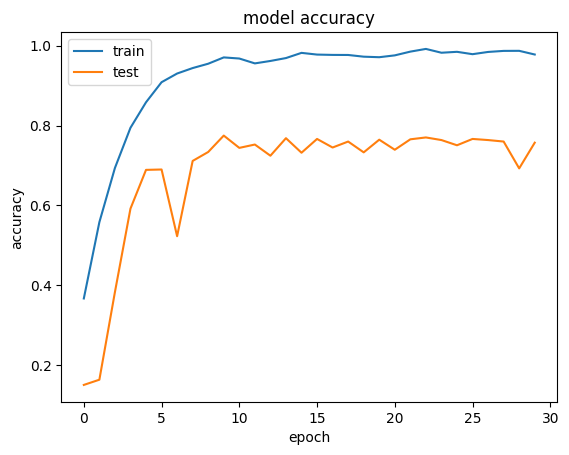

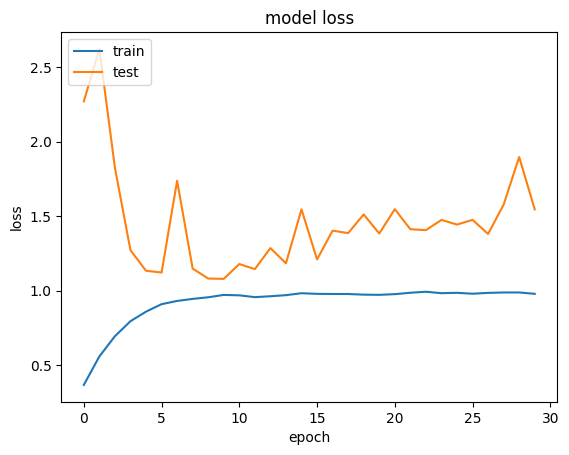

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred2 = model2.predict(X_test)
y_result2 = []

for pred1 in y_pred2:
    y_result2.append(np.argmax(pred1))
y_result2[:10]

34/34 [==============================] - 49s 1s/step


[2, 2, 3, 0, 3, 2, 3, 2, 6, 0]

In [ ]:
y_actual2 = []

for pred1 in y_test_n:
    y_actual2.append(np.argmax(pred1))
y_actual2[:10]

[2, 5, 3, 0, 3, 2, 3, 3, 6, 5]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual2, y_result2))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       140
           1       0.93      1.00      0.96       166
           2       0.70      0.73      0.72       166
           3       0.67      0.55      0.60       147
           4       0.62      0.62      0.62       136
           5       0.90      0.87      0.88       163
           6       0.76      0.67      0.71       152

    accuracy                           0.76      1070
   macro avg       0.75      0.75      0.75      1070
weighted avg       0.76      0.76      0.75      1070



Text(95.72222222222221, 0.5, 'Truth')

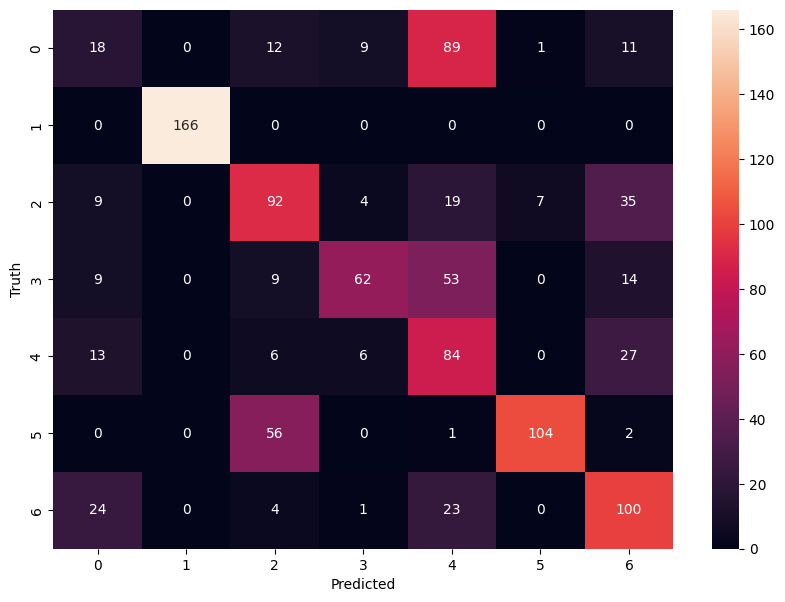

In [ ]:
import seaborn as sn
cm2 = tf.math.confusion_matrix(labels = y_actual2, predictions = y_result2)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Test Images


In [2]:
!wget https://www.dropbox.com/s/6e8bkfigau37u0u/test_images.zip

--2023-05-26 19:42:25--  https://www.dropbox.com/s/6e8bkfigau37u0u/test_images.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6e8bkfigau37u0u/test_images.zip [following]
--2023-05-26 19:42:25--  https://www.dropbox.com/s/raw/6e8bkfigau37u0u/test_images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc59edd6c36da7a95c39d7aaf33e.dl.dropboxusercontent.com/cd/0/inline/B8wpQ2wlXpXyqTlsBvL_3PVBQsoy_qwc25KFyjDtWH0xCOqJlErFIUjNOMjLnmtpgShgzSg24RS1pERq8znpKIYRryeYbOzQAlshurlqb498XjmvmZ9-yXnSpGGtSl2dTWp1CqjIckvVBdhpsRW0yPmh36qGGYU8CuT5Qrux0OGkMg/file# [following]
--2023-05-26 19:42:26--  https://uc59edd6c36da7a95c39d7aaf33e.dl.dropboxusercontent.com/cd/0/inline/B8wpQ2wlXpXyqTlsBvL_3PVBQsoy_qwc25KFyjDtWH0xCOqJlErFIUjNOMjLnmtpgShg

In [3]:
!unzip test_images.zip

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/download.jpg  
  inflating: test_images/downloadd.png  
  inflating: test_images/downloadd1.png  
  inflating: test_images/downloadd2.png  
  inflating: test_images/downloadd2a.png  
  inflating: test_images/downloadd2b.png  
  inflating: test_images/images (1).jpg  
  inflating: test_images/images (2).jpg  
  inflating: test_images/images.jpg  


# Test

In [4]:
!wget https://www.dropbox.com/s/852f07npbwjk7pl/play_soundd.zip

--2023-05-26 19:42:32--  https://www.dropbox.com/s/852f07npbwjk7pl/play_soundd.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/852f07npbwjk7pl/play_soundd.zip [following]
--2023-05-26 19:42:32--  https://www.dropbox.com/s/raw/852f07npbwjk7pl/play_soundd.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc94ef48064ab7c676b4d41126bd.dl.dropboxusercontent.com/cd/0/inline/B8xXnUMYvyUIT6zenA-F6XBxSn3LjY1gY8bedKthObce87KtK9MsYHdfXRsqzqI5UtmNeCPWsqPWiaGTAVDwQk0LvkZp2O6QL_jLKNIIjmYfaBIQNpaECI3PND3r-OEgSoL3g7BPY44QjwC9bXzNDX1qsfm4ieCmmdLUnRObIiQYaw/file# [following]
--2023-05-26 19:42:32--  https://uc94ef48064ab7c676b4d41126bd.dl.dropboxusercontent.com/cd/0/inline/B8xXnUMYvyUIT6zenA-F6XBxSn3LjY1gY8bedKthObce87KtK9MsYHdfXRsqzqI5UtmN

In [5]:
!unzip play_soundd.zip

Archive:  play_soundd.zip
  inflating: disgust.mp3             
  inflating: fear.mp3                
  inflating: happy.mp3               
  inflating: neutral.mp3             
  inflating: sad.mp3                 
  inflating: surprise.mp3            
  inflating: anger.mp3               


In [6]:
!pip install install playsound==1.2.2
from playsound import playsound


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# read image 
images = []
for filename in os.listdir('test_images'):
    path = os.path.join('test_images', filename)
    images.append(cv2.imread(path, -1))  

In [ ]:
# do prediction for the images
predictions = []
for img in images:
    # change to greyscale
    curr_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    curr_img = cv2.resize(curr_img, (48,48))
    curr_img = np.reshape(curr_img, (1,48, 48,1))
    predictions.append(np.argmax(model2.predict(curr_img)))

In [15]:
# list of given emotions
EMOTIONS = ['Angry', 'Disgust', 'Fear',
            'Happy', 'Sad', 'Surprise', 'Neutral']

# bgr to rgb
for i in range(9):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)            

# # #

In [16]:
predictions = [2, 2, 3, 0, 3, 2, 3, 2, 6, 0]

In [51]:
predictions

[2, 2, 3, 0, 3, 2, 3, 2, 6, 0]

# # #

In [18]:
EMOTIONS

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# sample audio playing

In [19]:
from IPython.display import Audio

In [ ]:
Audio('anger.mp3')

In [44]:
Audio('fear.mp3')

In [45]:
Audio('surprise.mp3')

In [47]:
Audio('disgust.mp3')

In [48]:
Audio('sad.mp3')

In [49]:
Audio('happy.mp3')

In [50]:
Audio('neutral.mp3')

# 

In [20]:
range(len(EMOTIONS))

range(0, 7)

Predicted Emotion: Angry
Angry


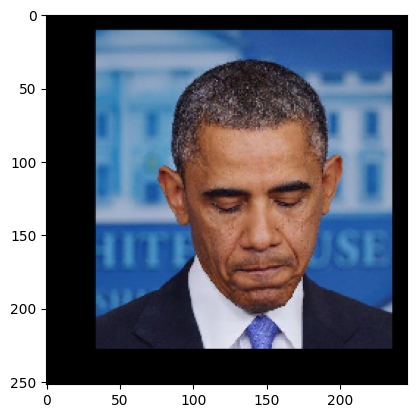

In [37]:
plt.imshow(images[3])
dataaa = str(EMOTIONS[predictions[3]])
print('Predicted Emotion: ' + dataaa)


if dataaa == 'Angry':
   Audio('anger.mp3')
   print('Angry')
elif dataaa == 'Disgust':
     Audio('disgust.mp3')
     print('Disgust')
elif dataaa == 'Fear':
     Audio('fear.mp3')
     print('fear')
elif dataaa == 'Happy':
     Audio('happy.mp3')
     print('happy')
elif dataaa == 'Sad':
     Audio('sad.mp3')
     print('sad')
elif dataaa == 'Surprise':
     Audio('surprise.mp3')
     print('surprise')
elif dataaa == 'Neutral':
     Audio('neutral.mp3')
     print('neutral')

Predicted Emotion: Happy
happy


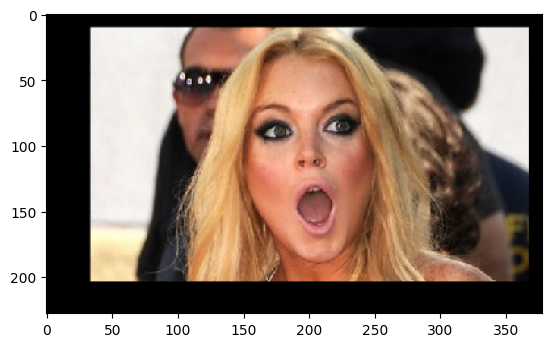

In [43]:
plt.imshow(images[4])
dataaa = str(EMOTIONS[predictions[4]])
print('Predicted Emotion: ' + dataaa)


if dataaa == 'Angry':
   Audio('anger.mp3')
   print('Angry')
elif dataaa == 'Disgust':
     Audio('disgust.mp3')
     print('Disgust')
elif dataaa == 'Fear':
     Audio('fear.mp3')
     print('fear')
elif dataaa == 'Happy':
     Audio('happy.mp3')
     print('happy')
elif dataaa == 'Sad':
     Audio('sad.mp3')
     print('sad')
elif dataaa == 'Surprise':
     Audio('surprise.mp3')
     print('surprise')
elif dataaa == 'Neutral':
     Audio('neutral.mp3')
     print('neutral')